<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

##### **Notebook Structure**

<ol style="list-style-type: upper-roman;font-weight: bold;">
  <li><span style="font-weight: normal;"><a href="#3">Modeling & Evaluation</a></span></li>
  <ol style="list-style-type:lower-alpha;">
    <li><span style="font-weight: normal;"><a href="#definition-of-the-problem">Definition of the Problem</a></span></li>
  </ol>
  <br>

  <ol style="list-style-type:alpha;">
    <li><span style="font-weight: normal;"><a href="#logistic-regression">Logistic Regression</a></span></li>
    <li><span style="font-weight: normal;"><a href="#naive-bayes">Naive Bayes</a></span></li>
    <ol style="list-style-type:lower-roman;">
      <li><span style="font-weight: normal;"><a href="#naive-bayes-categorical">Naive Bayes - Categorical</a></span></li>
      <li><span style="font-weight: normal;"><a href="#naive-bayes-gaussian">Naive Bayes - Gaussian</a></span></li>
    </ol>
    <li><span style="font-weight: normal;"><a href="#knn">K-Nearest Neighbors</a></span></li>
    <ol style="list-style-type:lower-roman;">
      <li><span style="font-weight: normal;"><a href="#knn-brute-force">KNN - Brute Force</a></span></li>
      <li><span style="font-weight: normal;"><a href="#knn-kd-tree">KNN - KD Tree</a></span></li>
      <li><span style="font-weight: normal;"><a href="#knn-ball-tree">KNN - Ball Tree</a></span></li>
      <li><span style="font-weight: normal;"><a href="#knn-locally-weighted-learning">KNN - Locally Weighted Learning (LWL)</a></span></li>
    </ol>
    <li><span style="font-weight: normal;"><a href="#neural-network">Neural Network</a></span></li>
    <li><span style="font-weight: normal;"><a href="#svm">Support Vector Machine</a></span></li>
    <li><span style="font-weight: normal;"><a href="#decision-tree">Decision Tree</a></span></li>
    <li><span style="font-weight: normal;"><a href="#random-forest">Random Forest</a></span></li>
    <li><span style="font-weight: normal;"><a href="#gradient-boosting">Gradient Boosting</a></span></li>
  </ol> <br>
  <ol style="list-style-type:decimal;">
    <li><span style="font-weight: normal;"><a href="#3_1">Model Selection</a></span></li>
    <li><span style="font-weight: normal;"><a href="#3_2">Model Evaluation</a></span></li>
    <li><span style="font-weight: normal;"><a href="#3_3">Model Optimization</a></span></li>
  </ol>
  <li><span style="font-weight: normal;"><a href="#📊-feature-importance">Feature Importance</a></span></li>
  <li><span style="font-weight: normal;"><a href="#🔮-test-data-prediction">Test Data Prediction</a></span></li>
  <li><span style="font-weight: normal;"><a href="#📋-csv-export---submission">CSV Export - Submission [Kaggle]</a></span></li>
</ol>

<br>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## 📚 Libraries Import


In [1]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

# For evaluation
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold, learning_curve

# Disable warnings [DataConversionWarning & ConvergenceWarning]
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

In [2]:
# Auxiliary function to display multiple dataframes side by side
# Source: https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, super_title, titles=cycle([''])):
    """
    :param args: Variable number of DataFrame objects to be displayed side by side.
    :param super_title: The main title to be displayed at the top of the combined view.
    :param titles: An iterable containing titles for each DataFrame to be displayed. Defaults to an infinite cycle of empty strings.
    
    :return: None. The function generates and displays HTML content side by side for given DataFrames.
    """
    html_str = ''
    html_str += f'<h1 style="text-align: left; margin-bottom: -15px;">{super_title}</h1><br>'
    html_str += '<div style="display: flex;">'
    for df, title in zip(args, chain(titles, cycle(['</br>']))):
        html_str += f'<div style="margin-right: 20px;"><h3 style="text-align: center;color:#555555;">{title}</h3>'
        html_str += df.to_html().replace('table', 'table style="display:inline; margin-right: 20px;"')
        html_str += '</div>'
    html_str += '</div>'
    display_html(html_str, raw=True)

## 🧮 Import Databases

In [3]:
# ------------------------------------------------- Importing the dataset -------------------------------------------------
X_train_ordinal_encoded = pd.read_parquet('X_train_ordinal_encoded.parquet')
X_val_ordinal_encoded = pd.read_parquet('X_val_ordinal_encoded.parquet')
test_data_ordinal_encoded = pd.read_parquet('test_data_ordinal_encoded.parquet')
y_train = pd.read_parquet('y_train.parquet')
y_val = pd.read_parquet('y_val.parquet')

X_train_ordinal_enc_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_train_ordinal_encoded), 
                                        columns = X_train_ordinal_encoded.columns, 
                                        index = X_train_ordinal_encoded.index)
X_validation_ordinal_enc_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_val_ordinal_encoded), 
                                            columns = X_val_ordinal_encoded.columns, 
                                            index = X_val_ordinal_encoded.index)

X_test_ordinal_enc_norm = pd.DataFrame(MinMaxScaler().fit_transform(test_data_ordinal_encoded), 
                                       columns = test_data_ordinal_encoded.columns, 
                                       index = test_data_ordinal_encoded.index)

In [4]:
# Drop features based on Feature Selection [2nd Notebook]
columns_to_keep_ordinal_encoded = [
'Weekly Wage Reported',
'Attorney/Representative',
'IME-4 Reported',
'First Hearing Date Binary',
'C-3 Date Binary'

]


X_train = X_train_ordinal_enc_norm[columns_to_keep_ordinal_encoded]
X_val = X_validation_ordinal_enc_norm[columns_to_keep_ordinal_encoded]
test_data = X_test_ordinal_enc_norm[columns_to_keep_ordinal_encoded]

# <a class='anchor' id='3'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>3 | Modeling & Evaluation</b></h1></center>
</div>

<br><br>

#### **📈📉 Data Normalization**

> For **Modeling & Evaluation**, we will normalize the data using the **`StandardScaler`**, **`MinMaxScaler`**, and **`Log`** methods, to evaluate the best performance of the models.

> With the **$log$ transformation**, the key goal is to reduce the skewness of the variables $\rightarrow$ this changes the variable's own distribution.

---

# **💡 Modeling**

### **Definition of the Problem**

> The problem consists of predict the WCB’s final decision on what type of injury (Claim Injury Type) should be granted. <br>
> Since the target variable is **category** and **multiclass**, we will use **Classification Models** to solve this problem.

In [9]:
# Function that will print the results of the classification report and the confusion matrix for both datasets (train and validation)
# Additionally, it will save results in a dictionary to compare the results of different models

models_results_train = {}
models_results_val = {}

def classification_metrics(model_name, cv_results,
                           y_train, pred_train, pred_train_proba, 
                           y_val, pred_val, pred_val_proba, classification_report=True):
    
    # Display model name
    display_html(f'<h1 style="text-align: left; margin-bottom: -15px;">{model_name}</h1><br>', raw=True)

    # Display the results of the cross-validation (KFold) - If classification_report=True
    if classification_report:
        # ------------------------------------- Classification Report  -------------------------------------
        print('___________________________________________________________________________________________________________')
        print('                                                     TRAIN                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_train, pred_train, target_names=[str(i) for i in np.unique(y_train)], zero_division=1))  
        # zero_division=1 to avoid warnings -> y_true contains labels that are not present in your predictions (y_pred)
        print('\nAUROC:', round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2)) # 'ovr' for multiclass

        print('___________________________________________________________________________________________________________')
        print('                                                VALIDATION                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_val, pred_val, target_names=[str(i) for i in np.unique(y_val)], zero_division=1))
        print('\nAUROC:', round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2))  # 'ovr' for multiclass
    
    # ----------------------------------- Confusion Matrix for Train and Validation side by side -----------------------------------

    # Confusion Matrix for Train and Validation side by side
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    sns.heatmap(confusion_matrix(y_train, pred_train, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7}, 
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val), ax=ax[0])
    ax[0].set_title('Confusion Matrix [Train]\n', fontsize=12, fontweight='bold')
    ax[0].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[0].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[0].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    sns.heatmap(confusion_matrix(y_val, pred_val, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7},
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val),ax=ax[1])
    ax[1].set_title('Confusion Matrix [Validation]\n', fontsize=12, fontweight='bold')
    ax[1].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[1].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[1].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

    # ----------------------------------- Save the results in a dictionary -----------------------------------
    # List of All Metrics for Classification Problems - Accuracy, Precision, Recall, F1 Score Macro (Kaggle Bechmark), ROC-AUC
    models_results_train[model_name] = {
        'Time of Execution (KFold)': str(cv_results['fit_time'].sum().round(2)) + ' +/-' + str(round(np.std(np.array(cv_results['fit_time'])), 2)),
        'Accuracy': round(accuracy_score(y_train, pred_train), 2),
        'Precision': round(metrics.precision_score(y_train, pred_train, average='macro', zero_division=np.nan), 2),
        'Recall': round(metrics.recall_score(y_train, pred_train, average='macro'), 2),
        'F1 Score': round(metrics.f1_score(y_train, pred_train, average='macro'), 2),
        'AUROC': round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2)
    }

    models_results_val[model_name] = {
        'Accuracy': round(accuracy_score(y_val, pred_val), 2),
        'Precision': round(metrics.precision_score(y_val, pred_val, average='macro', zero_division=np.nan), 2),
        'Recall': round(metrics.recall_score(y_val, pred_val, average='macro'), 2),
        'F1 Score': round(metrics.f1_score(y_val, pred_val, average='macro'), 2),
        'AUROC': round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2)
    }

---

### **Logistic Regression [<sup>[1]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)** <a class='anchor' id='logistic-regression'></a>

In [17]:
# ------------------------------------------------- Logistic Regression -------------------------------------------------
# ################################ Ordinal Encoding (with and without Standardization)
# ============ Original Data
lr_ord = LogisticRegression()
lr_cv_ord = cross_validate(lr_ord,X_train,y_train,cv=5)

# Train the model
lr_ord.fit(X_train, y_train)

# Predictions
lr_ord_pred_train = lr_ord.predict(X_train)
lr_ord_pred_train_proba = lr_ord.predict_proba(X_train)
lr_ord_pred_val = lr_ord.predict(X_val)
lr_ord_pred_val_proba = lr_ord.predict_proba(X_val)

Logistic Regression | Ordinal Encoding (With Normalization)

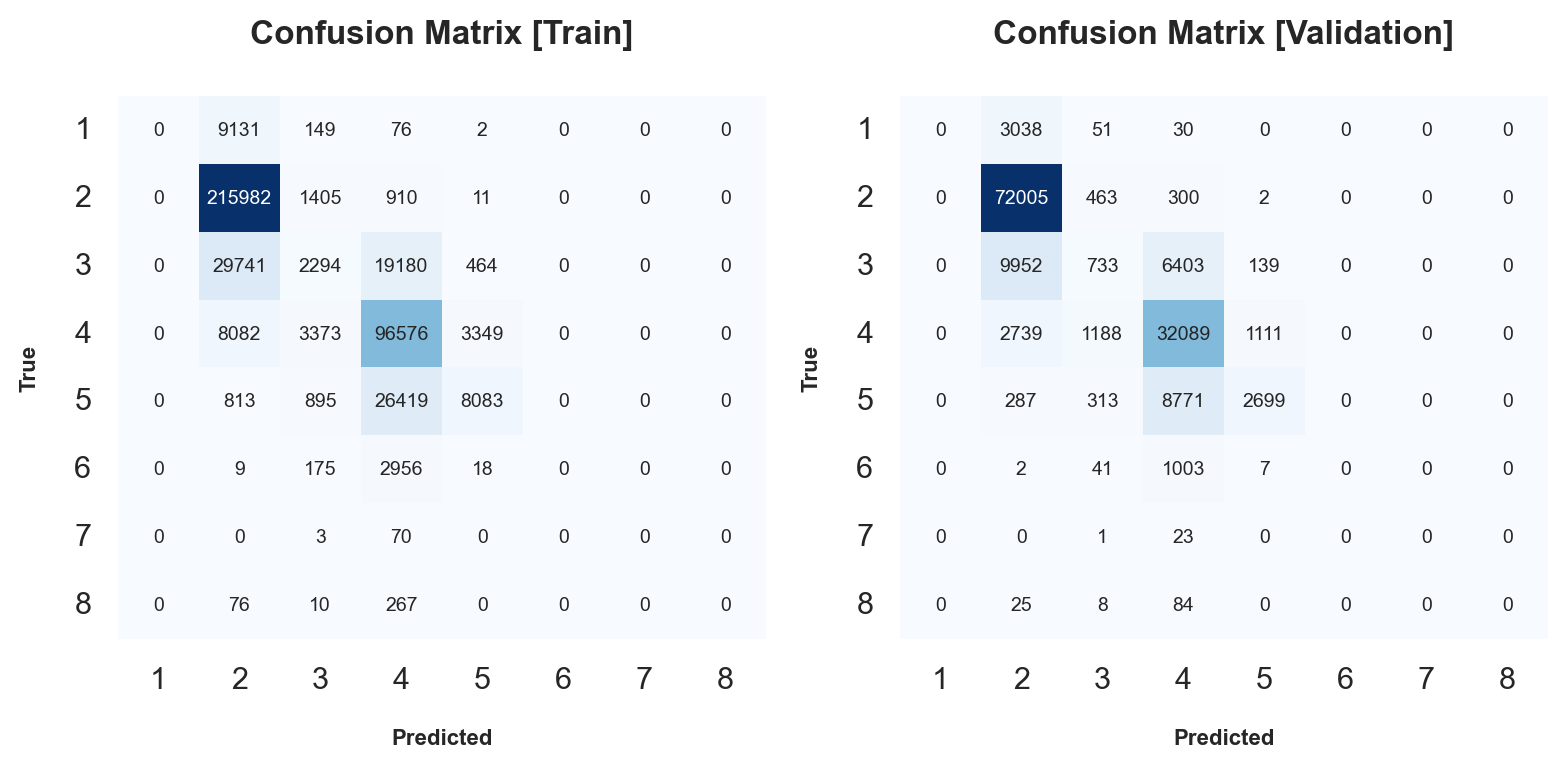

In [23]:
# Classification Metrics & Confusion Matrix

classification_metrics('Logistic Regression | Ordinal Encoding (With Normalization)', lr_cv_ord,
                        y_train, lr_ord_pred_train, lr_ord_pred_train_proba, 
                        y_val, lr_ord_pred_val, lr_ord_pred_val_proba, classification_report=False)
##############################################################################################################################################

In [25]:
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train, df_results_val, 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Logistic Regression Model')

Results of the Logistic Regression Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Logistic Regression | Ordinal Encoding (With Normalization) 
 90.89 +/-0.38 
 0.75 
 0.61 
 0.27 
 0.26 
 0.86 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Logistic Regression | Ordinal Encoding (With Normalization) 
 0.75 
 0.61 
 0.26 
 0.26 
 0.87

---

### **Naive Bayes [<sup>[2]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)** <a class='anchor' id='naive-bayes'></a>

> For the Naive Bayes model, we will use two different approaches: **Categorical** and **Gaussian**.
> - **Categorical**: This model is used when the features are categorical.
> - **Gaussian**: This model is used when the features are continuous.


> In this case, we will don't modeling with the Standardized/Normalized/Log-transformed Data, since the **Naive Bayes model doesn't require it**.

#### **Naive Bayes - Categorical** <sup>[**[2.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.CategoricalNB.html)</sup> <a class='anchor' id='naive-bayes-categorical'></a>

In [6]:
# ------------------------------------------------- Naïve Bayes [CategoricalNB] -------------------------------------------------
# ################################ Ordinal Encoding 
nb_ord = CategoricalNB()
nb_cv_ord = cross_validate(nb_ord,X_train,y_train,cv=5)

# Train the model
nb_ord.fit(X_train, y_train)

# Predictions
nb_ord_pred_train = nb_ord.predict(X_train)
nb_ord_pred_train_proba = nb_ord.predict_proba(X_train)
nb_ord_pred_val = nb_ord.predict(X_val)
nb_ord_pred_val_proba = nb_ord.predict_proba(X_val)

Naïve Bayes [CategoricalNB] | Ordinal Encoding (Original Data)

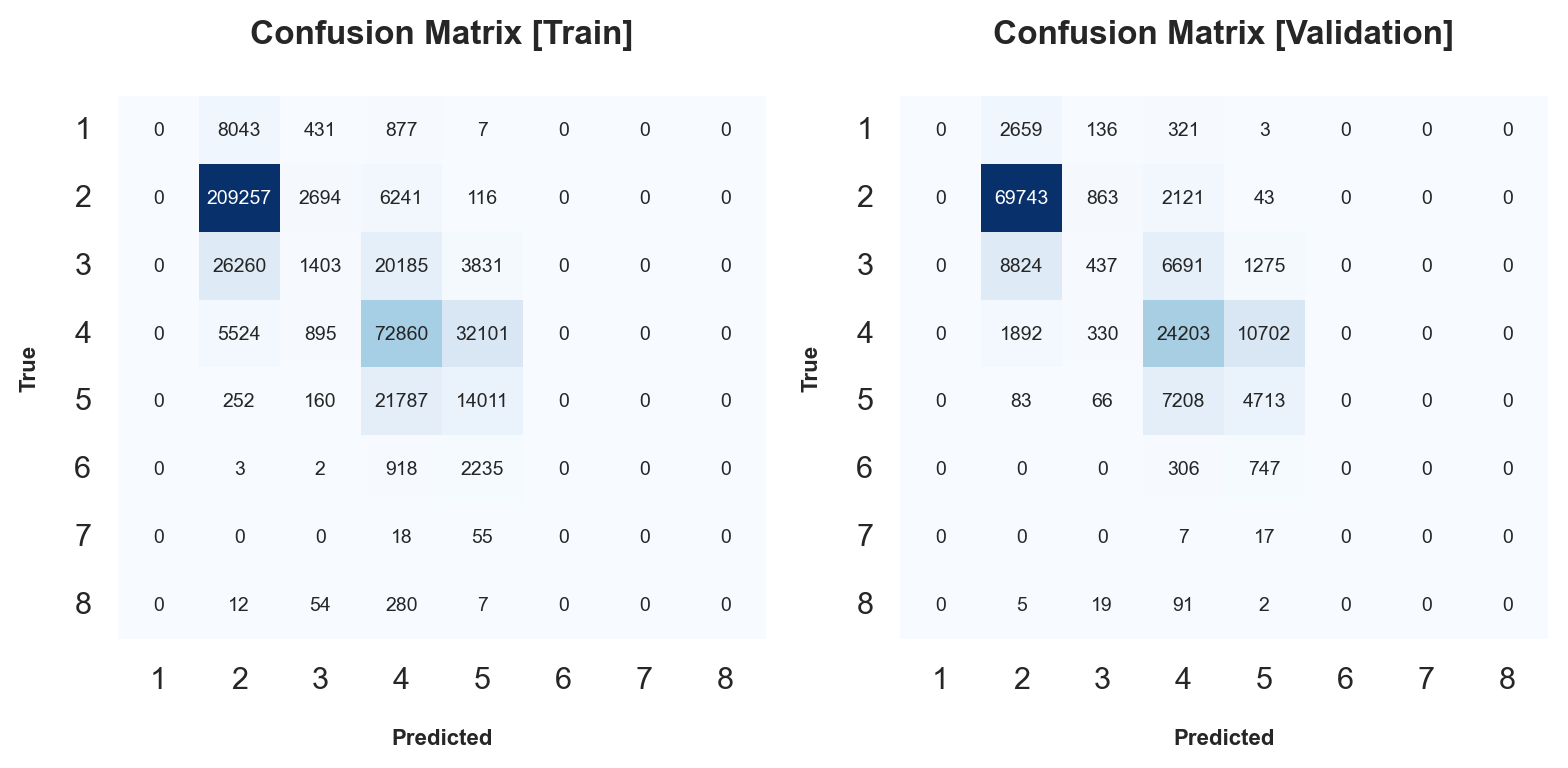

Results of the Naïve Bayes [CategoricalNB] Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC

In [12]:
# Classification Metrics & Confusion Matrix
classification_metrics('Naïve Bayes [CategoricalNB] | Ordinal Encoding (Original Data)', nb_cv_ord,
                       y_train, nb_ord_pred_train, nb_ord_pred_train_proba, 
                       y_val, nb_ord_pred_val, nb_ord_pred_val_proba, classification_report=False)


# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

In [21]:
# Display the results
display_side_by_side(df_results_train, df_results_val,
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Naïve Bayes [CategoricalNB] Model')

Results of the Naïve Bayes [CategoricalNB] Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Naïve Bayes [CategoricalNB] | Ordinal Encoding (Original Data) 
 12.03 +/-0.29 
 0.69 
 0.49 
 0.25 
 0.24 
 0.86 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Naïve Bayes [CategoricalNB] | Ordinal Encoding (Original Data) 
 0.69 
 0.48 
 0.25 
 0.23 
 0.86

#### **Naive Bayes - Gaussian** <sup>[**[2.2]**](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)</sup> <a class='anchor' id='naive-bayes-gaussian'></a>

In [11]:
# ------------------------------------------------- Naïve Bayes [GaussianNB] -------------------------------------------------
# ################################ Ordinal Encoding
gnb_ord = GaussianNB()
gnb_cv_ord = cross_validate(gnb_ord,X_train,y_train,cv=5)

# Train the model
gnb_ord.fit(X_train, y_train)

# Predictions
gnb_ord_pred_train = gnb_ord.predict(X_train)
gnb_ord_pred_train_proba = gnb_ord.predict_proba(X_train)
gnb_ord_pred_val = gnb_ord.predict(X_val)
gnb_ord_pred_val_proba = gnb_ord.predict_proba(X_val)

Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data)

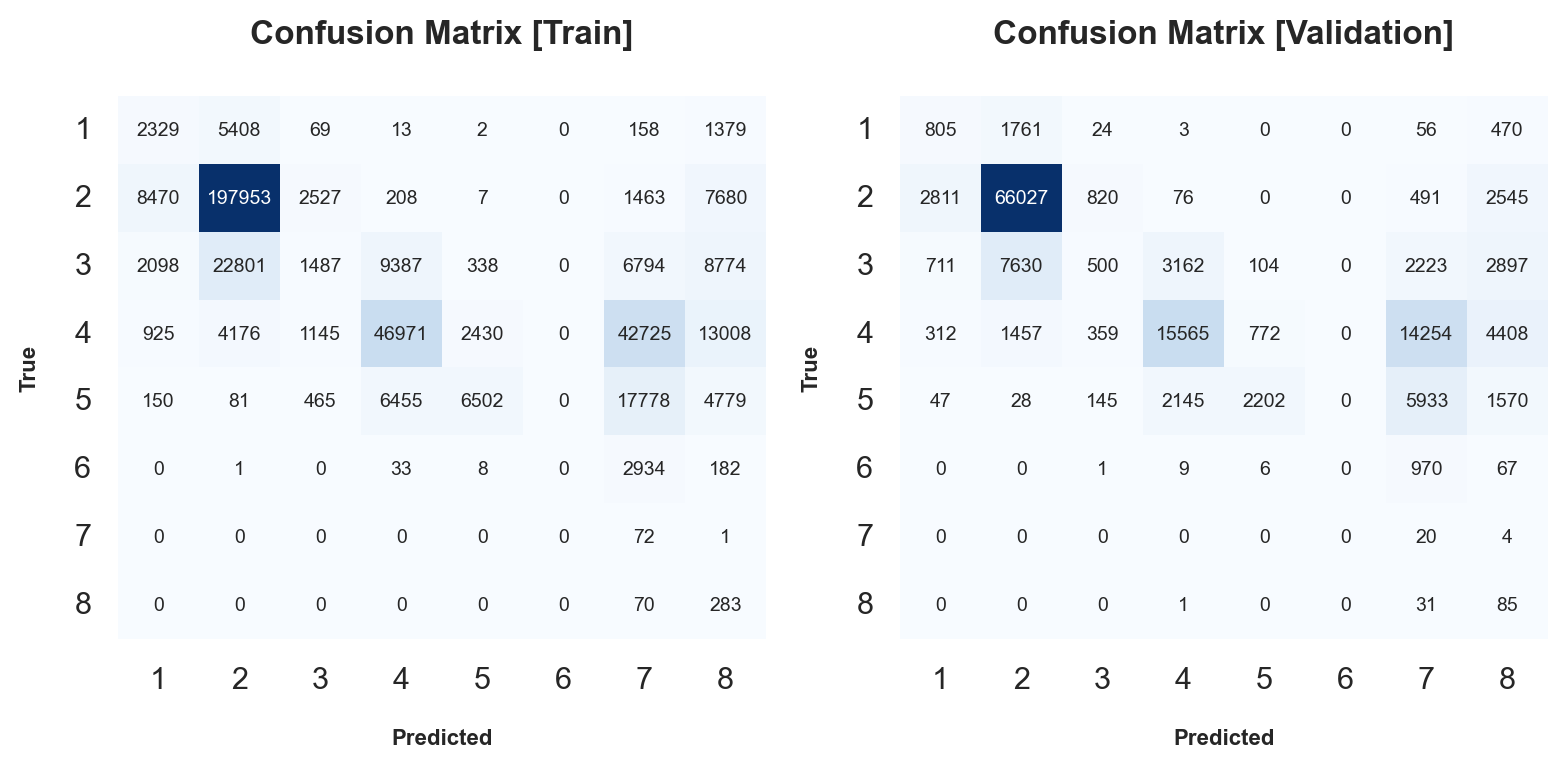

Results of the Naïve Bayes [GaussianNB] Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data) 
 0.74 +/-0.01 
 0.59 
 0.39 
 0.45 
 0.25 
 0.81 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data) 
 0.59 
 0.4 
 0.42 
 0.25 
 0.81

In [12]:
# Classification Metrics & Confusion Matrix
classification_metrics('Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data)', gnb_cv_ord,
                       y_train, gnb_ord_pred_train, gnb_ord_pred_train_proba, 
                       y_val, gnb_ord_pred_val, gnb_ord_pred_val_proba, classification_report=False)

# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train, df_results_val,
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Naïve Bayes [GaussianNB] Model')

---

### **K-Nearest Neighbors (KNN) [<sup>[3]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)** <a class='anchor' id='knn'></a>

#### **KNN - Brute Force** <sup>[**[3.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-brute-force'></a>

In [ ]:
# ------------------------------------------------- K-Nearest Neighbors [Brute Force Algorithm] -------------------------------------------------
# ################################ Ordinal Encoding
knn_ord = KNeighborsClassifier()
knn_cv_ord = cross_validate(knn_ord,X_train,y_train,cv=5)

# Train the model
knn_ord.fit(X_train, y_train)

# Predictions
knn_ord_pred_train = knn_ord.predict(X_train)
knn_ord_pred_train_proba = knn_ord.predict_proba(X_train)
knn_ord_pred_val = knn_ord.predict(X_val)
knn_ord_pred_val_proba = knn_ord.predict_proba(X_val)

In [ ]:
# Classification Metrics & Confusion Matrix
classification_metrics('K-Nearest Neighbors [Brute Force Algorithm] | Ordinal Encoding (Original Data)', knn_cv_ord,
                       y_train, knn_ord_pred_train, knn_ord_pred_train_proba, 
                       y_val, knn_ord_pred_val, knn_ord_pred_val_proba, classification_report=False)


# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train, df_results_val, 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the K-Nearest Neighbors [Brute Force Algorithm] Model')

#### **KNN - KD Tree** <sup>[**[3.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-kd-tree'></a>

In [18]:
# ------------------------------------------------- K-Nearest Neighbors [KD Tree Algorithm] -------------------------------------------------
# ################################ Ordinal Encoding
knn_ord_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_cv_ord_kd = cross_validate(knn_ord_kd,X_train,y_train,cv=5)

# Train the model
knn_ord_kd.fit(X_train, y_train)

# Predictions
knn_ord_kd_pred_train = knn_ord_kd.predict(X_train)
knn_ord_kd_pred_train_proba = knn_ord_kd.predict_proba(X_train)
knn_ord_kd_pred_val = knn_ord_kd.predict(X_val)
knn_ord_kd_pred_val_proba = knn_ord_kd.predict_proba(X_val)

K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (Original Data)

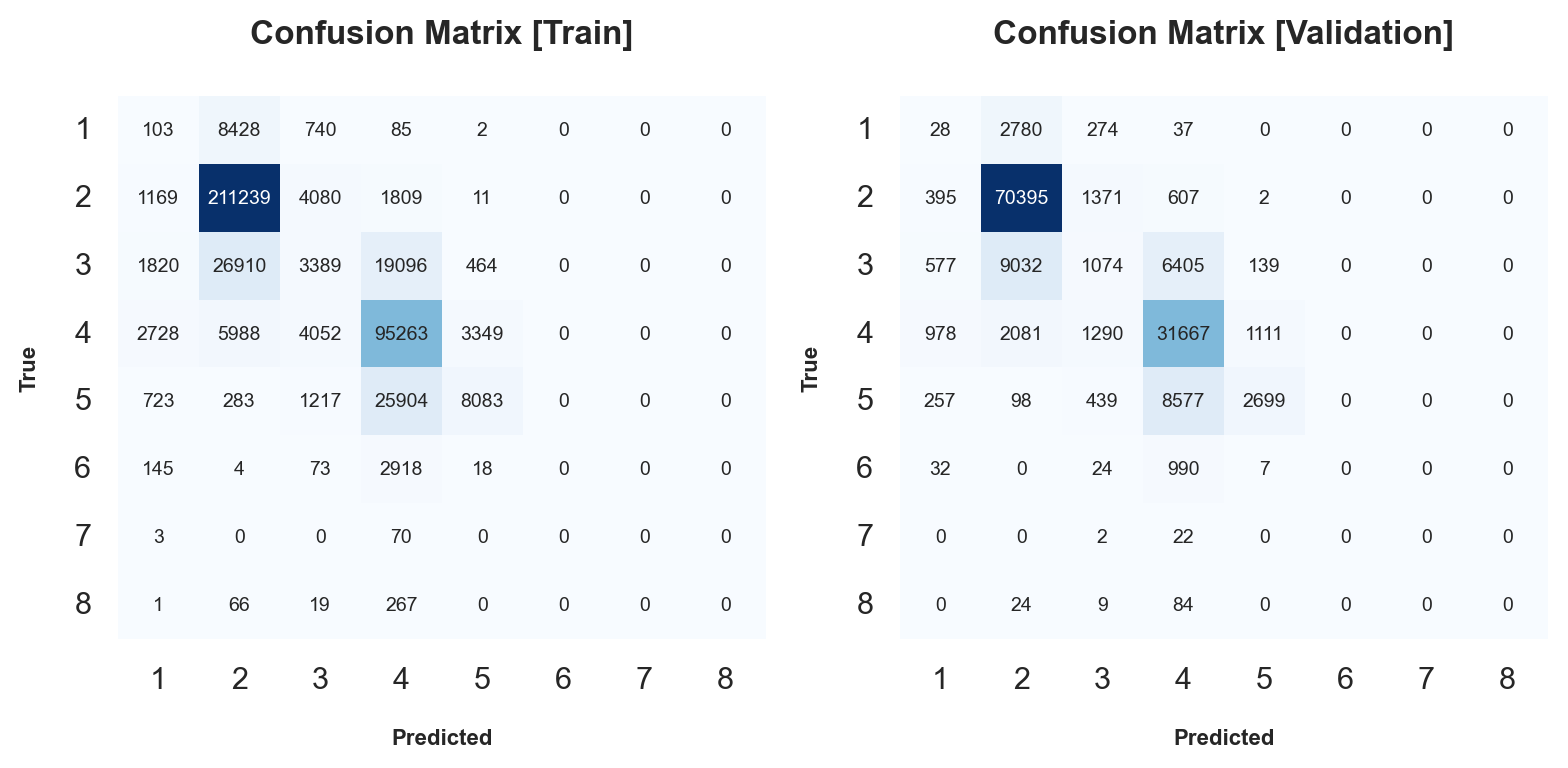

Results of the K-Nearest Neighbors [KD Tree Algorithm] Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data) 
 0.74 +/-0.01 
 0.59 
 0.39 
 0.45 
 0.25 
 0.81 
 
 
 K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (Original Data) 
 3.58 +/-0.07 
 0.74 
 0.49 
 0.27 
 0.26 
 0.68 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data) 
 0.59 
 0.40 
 0.42 
 0.25 
 0.81 
 
 
 K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (Original Data) 
 0.74 
 0.48 
 0.26 
 0.26 
 0.68

In [19]:
# Classification Metrics & Confusion Matrix
classification_metrics('K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (Original Data)', knn_cv_ord_kd,
                       y_train, knn_ord_kd_pred_train, knn_ord_kd_pred_train_proba, 
                       y_val, knn_ord_kd_pred_val, knn_ord_kd_pred_val_proba, classification_report=False)

# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train, df_results_val, 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the K-Nearest Neighbors [KD Tree Algorithm] Model')

#### **KNN - Ball Tree** <sup>[**[3.2]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-ball-tree'></a> 

In [20]:
# ------------------------------------------------- K-Nearest Neighbors [Ball Tree Algorithm] -------------------------------------------------
# ################################ Ordinal Encoding
knn_ord_bt = KNeighborsClassifier(algorithm='ball_tree')
knn_cv_ord_bt = cross_validate(knn_ord_bt,X_train,y_train,cv=5)

# Train the model
knn_ord_bt.fit(X_train, y_train)

# Predictions
knn_ord_bt_pred_train = knn_ord_bt.predict(X_train)
knn_ord_bt_pred_train_proba = knn_ord_bt.predict_proba(X_train)
knn_ord_bt_pred_val = knn_ord_bt.predict(X_val)
knn_ord_bt_pred_val_proba = knn_ord_bt.predict_proba(X_val)

K-Nearest Neighbors [Ball Tree Algorithm] | Ordinal Encoding (Original Data)

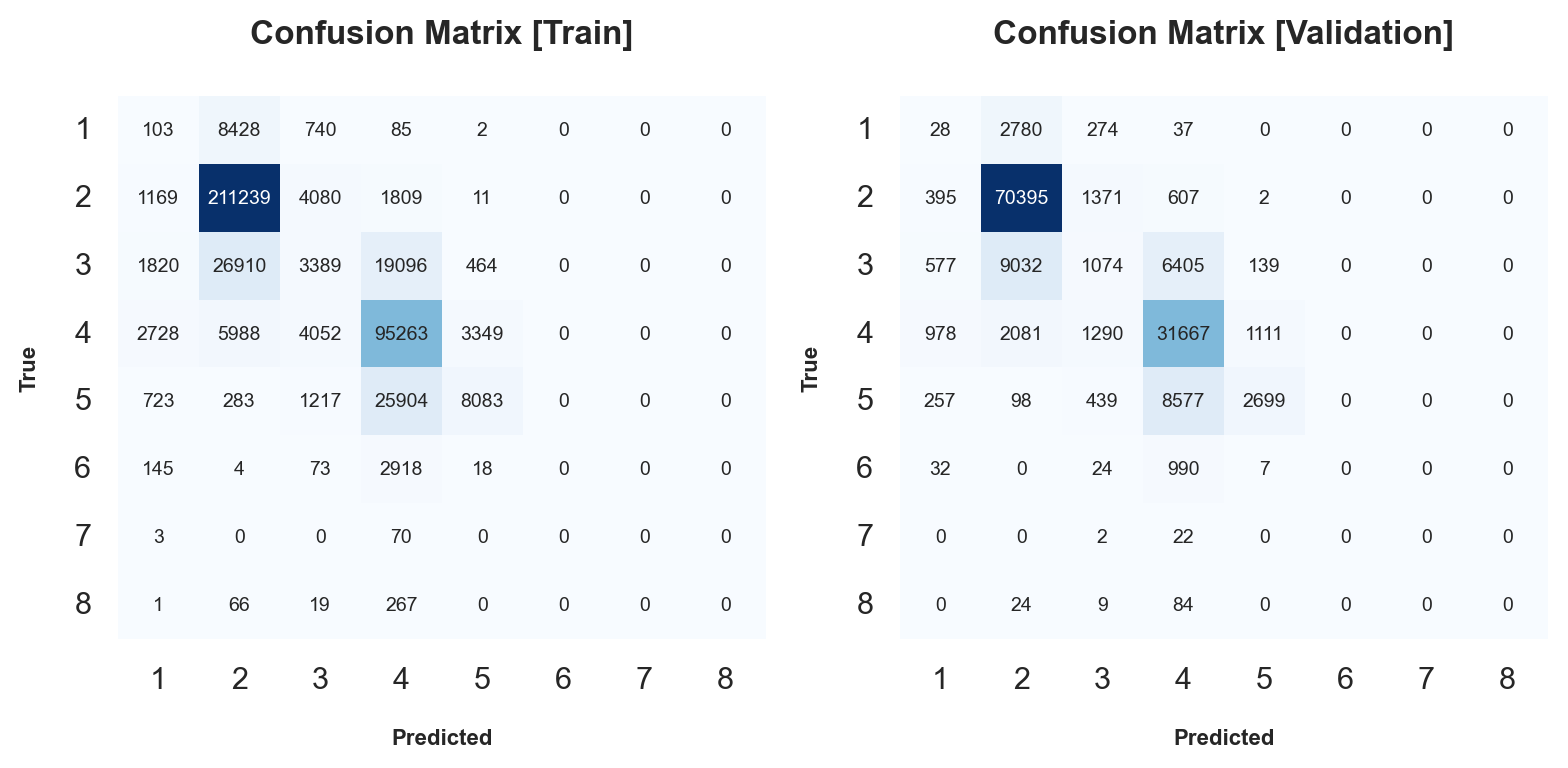

Results of the K-Nearest Neighbors [Ball Tree Algorithm] Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data) 
 0.74 +/-0.01 
 0.59 
 0.39 
 0.45 
 0.25 
 0.81 
 
 
 K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (Original Data) 
 3.58 +/-0.07 
 0.74 
 0.49 
 0.27 
 0.26 
 0.68 
 
 
 K-Nearest Neighbors [Ball Tree Algorithm] | Ordinal Encoding (Original Data) 
 3.79 +/-0.09 
 0.74 
 0.49 
 0.27 
 0.26 
 0.68 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data) 
 0.59 
 0.40 
 0.42 
 0.25 
 0.81 
 
 
 K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (Original Data) 
 0.74 
 0.48 
 0.26 
 0.26 
 0.68 
 
 
 K-Nearest Neighbors [Ball Tree Algorithm] | Ordinal Encoding (Original Data) 
 0.74 
 0.48 
 0.26 
 0.26 
 0.68

In [21]:
# Classification Metrics & Confusion Matrix
classification_metrics('K-Nearest Neighbors [Ball Tree Algorithm] | Ordinal Encoding (Original Data)', knn_cv_ord_bt,
                       y_train, knn_ord_bt_pred_train, knn_ord_bt_pred_train_proba, 
                       y_val, knn_ord_bt_pred_val, knn_ord_bt_pred_val_proba, classification_report=False)

# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train, df_results_val, 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the K-Nearest Neighbors [Ball Tree Algorithm] Model')

#### **KNN - Locally Weighted Learning (LWL)** <sup>[**[3.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html)</sup> <a class='anchor' id='knn-locally-weighted-learning'></a>

In [ ]:
# ------------------------------------------------- K-Nearest Neighbors [LWL Algorithm] -------------------------------------------------
# ???

# I don't know how to implement the 'Locally Weighted Learning' algorithm in Python. 

---

> **Note:** Since we have not covered more algorithms in class yet, the notebook for the **Homework** was tested with the algorithms above. For the next phase, we intend to continue testing this classification problem with the remaining algorithms, such as the following, with the aim of improving the performance of the model on the benchmark **F1-Score (Macro)**.

### **Neural Network [<sup>[4]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html)** <a class='anchor' id='neural-network'></a>

---

### **Decision Tree[<sup>[5]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)** <a class='anchor' id='decision-tree'></a>

---

### **Random Forest[<sup>[6]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html)** <a class='anchor' id='random-forest'></a>

---

### **Support Vector Machine (SVM)[<sup>[7]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html)** <a class='anchor' id='svm'></a>

---

### **Gradient Boosting[<sup>[8]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)** <a class='anchor' id='gradient-boosting'></a>

---

### <a class='anchor' id='3_1'></a> **🧪 Model Selection**

In [ ]:
# Save the results in a Excel file
df_results_train.index.name = 'Model'
df_results_val.index.name = 'Model'

df_results_train.to_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/Models_Results_30.10.2024.xlsx',          ################# Change the day
                          sheet_name='Train_AndreSilvestre')                                                    ################# Change the name of the sheet
df_results_val.to_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/Models_Results_30.10.2024.xlsx',            ################# Change the day
                        sheet_name='Validation_AndreSilvestre')                                                ################# Change the name of the sheet

<div class="alert alert-block alert-info" style='font-size:30px;font-weight: bold;'>

Hypothetically

</div>

In [ ]:
# The best model until XX.11.2024 is the K-Nearest Neighbors [Ball Tree Algorithm] with One-Hot Encoding.

# Train the best model
knn_ohe_bt.fit(X_train_ohe, y_train)

# Predictions
knn_ohe_bt_pred_train = knn_ohe_bt.predict(X_train_ohe)
knn_ohe_bt_pred_train_proba = knn_ohe_bt.predict_proba(X_train_ohe)

knn_ohe_bt_pred_val = knn_ohe_bt.predict(X_val_ohe)
knn_ohe_bt_pred_val_proba = knn_ohe_bt.predict_proba(X_val_ohe)

---

### <a class='anchor' id='3_2'></a> **📏 Model Evaluation**

In [ ]:
# Classification Metrics & Confusion Matrix
classification_metrics('K-Nearest Neighbors [Ball Tree Algorithm] | One-Hot Encoding', knn_cv_ohe_bt,
                        y_train, knn_ohe_bt_pred_train, knn_ohe_bt_pred_train_proba, 
                        y_val, knn_ohe_bt_pred_val, knn_ohe_bt_pred_val_proba, classification_report=True)

In [ ]:
# AUC-ROC Curve
# Train
plot_roc_curve(knn_ohe_bt, X_train_ohe, y_train, name='Train')
# Validation
plot_roc_curve(knn_ohe_bt, X_val_ohe, y_val, name='Validation')


In [ ]:
# [To be continued...]

---

### <a class='anchor' id='3_3'></a> **📈 Model Optimization**

In [ ]:
# Optimizing the hyperparameters of the best model
# ------------------------------------------- Grid Search Cross Validation -------------------------------------------
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Hyperparameters to be optimized
k_range = list(range(1, 31))              # Number of neighbors to use by default for kneighbors queries.
param_grid = {
    'n_neighbors': k_range,               # Default: 5 -> Number of neighbors to use by default for kneighbors queries.
    'weights': ['uniform', 'distance'],   # Default: 'uniform' -> weight function used in prediction. 'distance' -> closer neighbors of a query point will have a greater influence than neighbors which are further away.
    'p': [1, 2]                           # Default: 2 -> Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
}

# Grid Search Cross Validation
grid_search = GridSearchCV(knn_ohe_bt,              # Model
                           param_grid,              # Hyperparameters
                           cv=5,                    # Cross-Validation with 5 folds
                           scoring='f1_macro',      # Metric to optimize
                           n_jobs=-1,               # Use all processors (parallelize the execution -> faster)
                           return_train_score=True, # Return the training score
                           verbose=2)               # Print messages (- > 1 : the computation time for each fold and parameter candidate is displayed;
                                                    #                 - > 2 : the score is also displayed;

# Train the GridSearchCV
grid_search.fit(X_train_ohe, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print('Best Hyperparameters:\n', best_params)
print('Best Score:\n', best_score)
print('Best Estimator:\n', best_estimator)

In [ ]:
# Save the optimization results in a Excel file
df_results = pd.DataFrame(grid_search.cv_results_)
df_results.to_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/GridSearch_Results_11.11.2024.xlsx')                ################# Change the day

In [ ]:
# Plot the results of the Grid Search
# Source: https://www.kaggle.com/code/melihkanbay/knn-best-parameters-gridsearchcv

# Get the results of the Grid Search
grid_mean_scores = grid_search.cv_results_['mean_test_score']
print(grid_mean_scores)

# Plot the results of the Grid Search - Best K
plt.plot(k_range, grid_mean_scores, color='#08519C', marker='o', markersize=5)
plt.xlabel('Value of K for KNN', fontsize=12, fontweight='bold')
plt.ylabel('Cross-Validated Accuracy', fontsize=12, fontweight='bold')
plt.title('Grid Search Cross-Validation Results | Best K', fontsize=14, fontweight='bold')

sns.despine(right=True, top=True)  
plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/Grid_Search_CV_Best_K_11.11.2024.png', dpi=200, bbox_inches='tight')  ################# Change the name of the file
plt.show()

In [ ]:
# Train the best model with the best hyperparameters
best_knn_ohe_bt = KNeighborsClassifier(**best_params)
best_knn_ohe_bt.fit(X_train_ohe, y_train)

# Predictions
best_knn_ohe_bt_pred_train = best_knn_ohe_bt.predict(X_train_ohe)
best_knn_ohe_bt_pred_train_proba = best_knn_ohe_bt.predict_proba(X_train_ohe)

best_knn_ohe_bt_pred_val = best_knn_ohe_bt.predict(X_val_ohe)
best_knn_ohe_bt_pred_val_proba = best_knn_ohe_bt.predict_proba(X_val_ohe)

# Classification Metrics & Confusion Matrix
classification_metrics('K-Nearest Neighbors [Ball Tree Algorithm] | One-Hot Encoding (Optimized)', grid_search,
                        y_train, best_knn_ohe_bt_pred_train, best_knn_ohe_bt_pred_train_proba, 
                        y_val, best_knn_ohe_bt_pred_val, best_knn_ohe_bt_pred_val_proba, classification_report=True)

In [ ]:
# ROC Curve
# Train
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, best_knn_ohe_bt_pred_train_proba[:,1])
roc_auc_train = auc(fpr_train, tpr_train)

# Validation
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, best_knn_ohe_bt_pred_val_proba[:,1])
roc_auc_val = auc(fpr_val, tpr_val)

# Plot
plt.figure(figsize=(8,5))
plt.plot(fpr_train, tpr_train, label='ROC Train (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, label='ROC Validation (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('\nFalse Positive Rate', fontsize=10, fontweight='bold')
plt.ylabel('True Positive Rate\n', fontsize=10, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC Curve)\n', fontweight='bold', fontsize=14)
plt.legend(loc="lower right")
sns.despine(right=True, top=True)
plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/ROC_Curve_KNN_OHE_BT_Optimized_11.11.2024.png', dpi=300, bbox_inches='tight') ####### Change the name of the file
plt.show()

---

### 📊 **Feature Importance**

In [ ]:
# [To be continued...]

---

## 🔮 **Test Data Prediction**

In [ ]:
# # Best Model
# best_model = XXXXXXXXXXXX

# # Predictions on the test_data
# pred_test_ord = best_model.predict(test_data_ordinal_encoded)
# pred_test_ohe = best_model.predict(test_data_ohe)

In [ ]:
# # Dictionary with the mapping of the predicted values
# claim_injury_type_dict_swapped = {1: "1. CANCELLED", 2: "2. NON-COMP", 3: "3. MED ONLY", 4: "4. TEMPORARY",
#                                   5: "5. PPD SCH LOSS", 6: "6. PPD NSL", 7: "7. PTD", 8: "8. DEATH"}

# # Create a DataFrame with the 'ID' and the 'Predicted' columns
# submission_data = pd.DataFrame({'Claim Identifier': test_data['Claim Identifier'], 'Claim Injury Type': pred_test_ohe})
# submission_data['Claim Injury Type'] = submission_data['Claim Injury Type'].map(claim_injury_type_dict_swapped)
# submission_data

---

## 📋 **CSV Export - Submission**

In [ ]:
# # Each submission in Kaggle should have different names and should have the version name in the following format 
# # – GroupXX_VersionXX.csv (for example, Group 1 submitted his 8th version, the file should be named Group01__Version08.csv)

# submission_data.to_csv('submissions/Group33_Version01.csv', index=False, header=True, sep=',')
# # submission_data.to_csv('submissions/Group33_Version02.csv', index=False, header=True, sep=',')

---